# Taller de modelos de clasificación utilizando KNN

El objetivo es que puedan asimilar el proceso de aprendizaje de modelos de aprendizaje supervisado (en este caso de clasificación). En este taller encontrarán código que deberán reproducir en sus propios ambientes de desarrollo. Incluye preguntas precisas; para responderlas tendrán que ejecutar el código, pues no todas las porciones de código del taller muestran los resultados.

# 1. Análisis exploratorio (muy básico…)

# Librerías a importar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, neighbors, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

# Cargar y explorar el dataset de defaults de churn de clientes

In [3]:
data = pd.read_csv('04-03-churn.csv', sep=';', na_values=".")
print(data.shape)
data.head(5)

(20000, 12)


COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   
4     one   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   
4                           21                      1            very_unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1               little                considering   STAY  
2          very_little                    perhaps   STAY  
3            very_high                considering  LEAVE  
4               little              never_thought   STAY

In [4]:
data.describe()

INCOME       OVERAGE      LEFTOVER          HOUSE  \
count   20000.000000  20000.000000  20000.000000   20000.000000   
mean    80281.447750     85.979550     23.898650  493155.264250   
std     41680.586319     85.992324     26.816645  252407.884692   
min     20007.000000     -2.000000      0.000000  150002.000000   
25%     42217.000000      0.000000      0.000000  263714.250000   
50%     75366.500000     59.000000     14.000000  452259.500000   
75%    115881.750000    179.000000     41.000000  702378.000000   
max    159983.000000    335.000000     89.000000  999996.000000   

       HANDSET_PRICE  OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  
count   20000.000000                 20000.000000           20000.000000  
mean      389.615100                     8.000700               6.002250  
std       213.820682                     8.925418               4.402558  
min       130.000000                     0.000000               1.000000  
25%       219.000000                     1.000000               2.000000  
50%       326.000000                     4.000000               5.000000  
75%       533.250000                    15.000000              10.000000  
max       899.000000                    29.000000              15.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [6]:
data.LEAVE.describe()

count     20000
unique        2
top        STAY
freq      10148
Name: LEAVE, dtype: object

In [7]:
data.LEAVE.describe()['freq'] / data.LEAVE.describe()['count']

0.5074

In [8]:
data.LEAVE.value_counts()

STAY     10148
LEAVE     9852
Name: LEAVE, dtype: int64

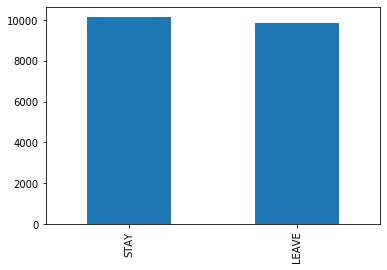

In [9]:
data.LEAVE.value_counts().plot.bar()

PREGUNTA: ¿Qué ven de particular en los datos?

# Repaso de acceso a características y datos de un dataframe

In [10]:
data.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

In [11]:
data.iloc[0:4,]

COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1               little                considering   STAY  
2          very_little                    perhaps   STAY  
3            very_high                considering  LEAVE

In [12]:
data.iloc[0:4,1:4]

INCOME  OVERAGE  LEFTOVER
0   31953        0         6
1   36147        0        13
2   27273      230         0
3  120070       38        33

In [13]:
data.LEAVE.iloc[1:5]

1     STAY
2     STAY
3    LEAVE
4     STAY
Name: LEAVE, dtype: object

In [14]:
data.iloc[0:10,[0,4]]

COLLEGE   HOUSE
0    zero  313378
1     one  800586
2     one  305049
3    zero  788235
4     one  224784
5    zero  632969
6    zero  697949
7     one  688098
8    zero  274218
9    zero  153560

In [15]:
data.loc[0:10,['COLLEGE','HOUSE']]

COLLEGE   HOUSE
0     zero  313378
1      one  800586
2      one  305049
3     zero  788235
4      one  224784
5     zero  632969
6     zero  697949
7      one  688098
8     zero  274218
9     zero  153560
10    zero  623166

In [16]:
data.values

array([['zero', 31953, 0, ..., 'little', 'no', 'STAY'],
       ['one', 36147, 0, ..., 'little', 'considering', 'STAY'],
       ['one', 27273, 230, ..., 'very_little', 'perhaps', 'STAY'],
       ...,
       ['zero', 78529, 0, ..., 'very_high', 'considering', 'LEAVE'],
       ['zero', 78674, 47, ..., 'little', 'considering', 'LEAVE'],
       ['zero', 124697, 0, ..., 'high', 'actively_looking_into_it',
        'LEAVE']], dtype=object)

# Visualización de las distribuciones de las variables independientes.

# Univariadamente

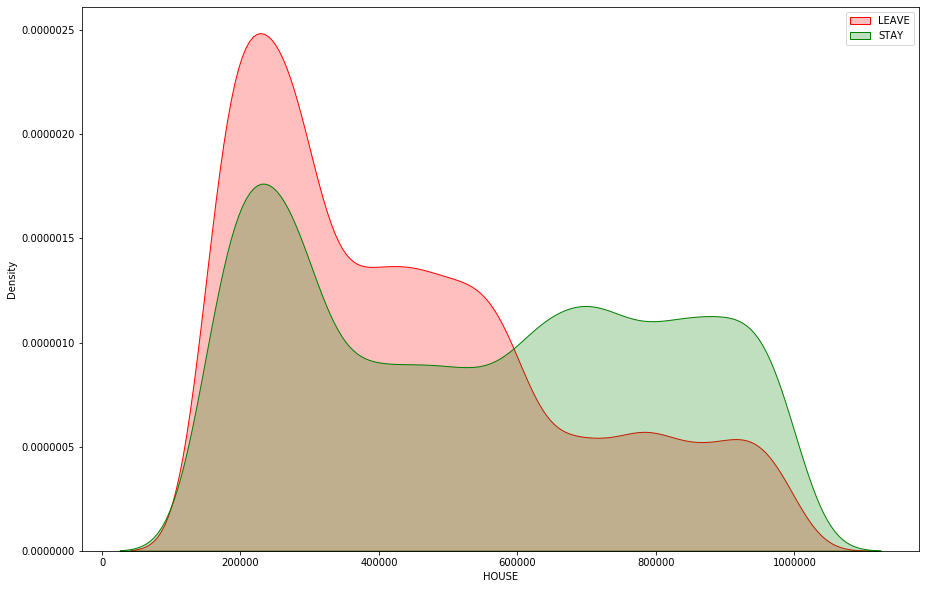

In [17]:
plt.figure(figsize=(15,10))
sns.kdeplot(data[data['LEAVE']=='LEAVE']['HOUSE'], shade=True, color='r')
sns.kdeplot(data[data['LEAVE']=='STAY']['HOUSE'], shade=True, color='g')
plt.legend(['LEAVE', 'STAY'])

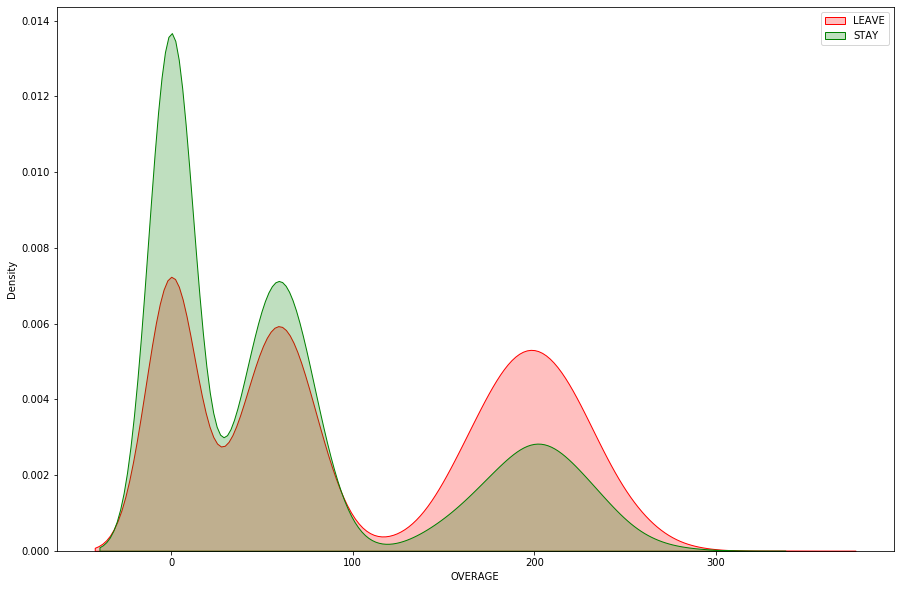

In [18]:
plt.figure(figsize=(15,10))
sns.kdeplot(data[data['LEAVE']=='LEAVE']['OVERAGE'], shade=True, color='r')
sns.kdeplot(data[data['LEAVE']=='STAY']['OVERAGE'], shade=True, color='g')
plt.legend(['LEAVE', 'STAY'])

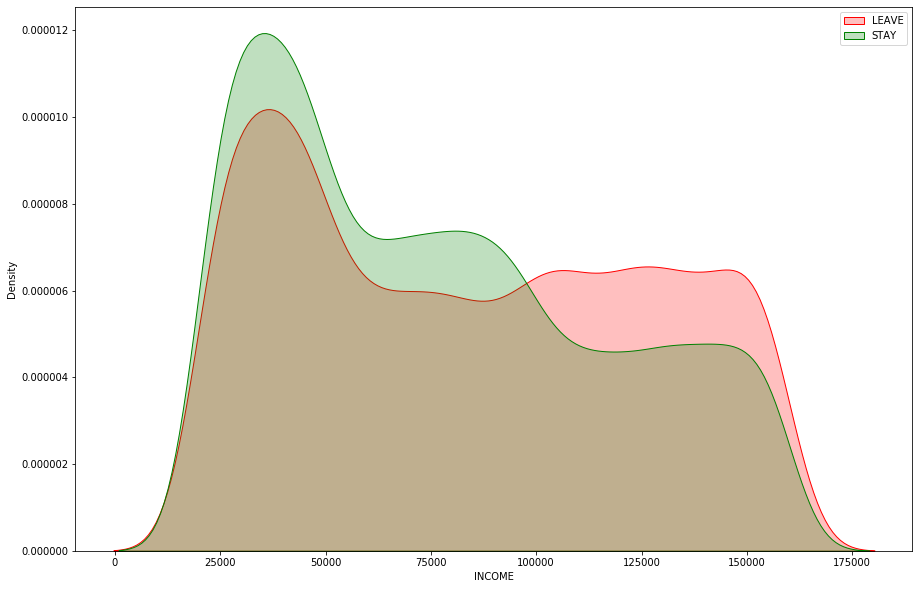

In [19]:
plt.figure(figsize=(15,10))
sns.kdeplot(data[data['LEAVE']=='LEAVE']['INCOME'], shade=True, color='r')
sns.kdeplot(data[data['LEAVE']=='STAY']['INCOME'], shade=True, color='g')
plt.legend(['LEAVE', 'STAY'])

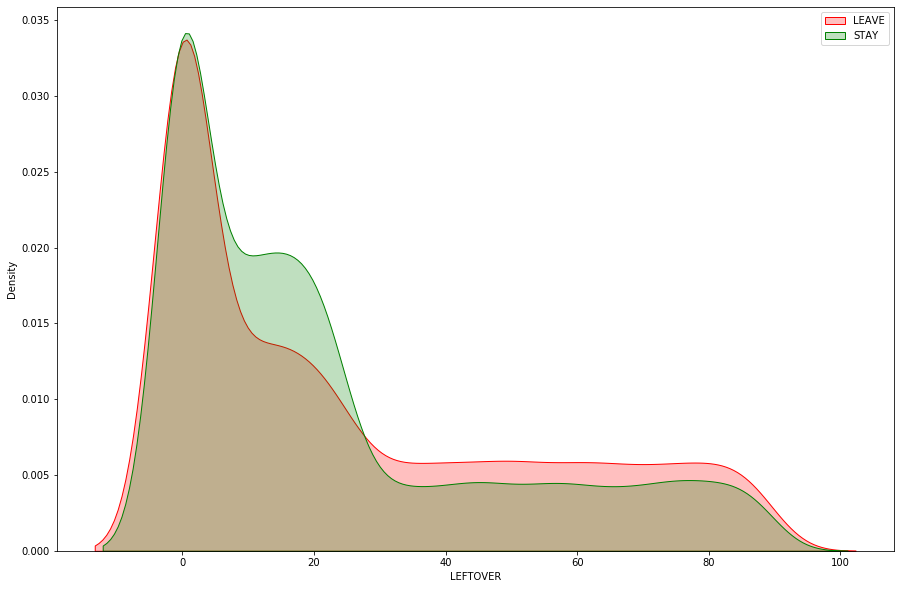

In [20]:
plt.figure(figsize=(15,10))
sns.kdeplot(data[data['LEAVE']=='LEAVE']['LEFTOVER'], shade=True, color='r')
sns.kdeplot(data[data['LEAVE']=='STAY']['LEFTOVER'], shade=True, color='g')
plt.legend(['LEAVE', 'STAY'])

# Bivariadamente

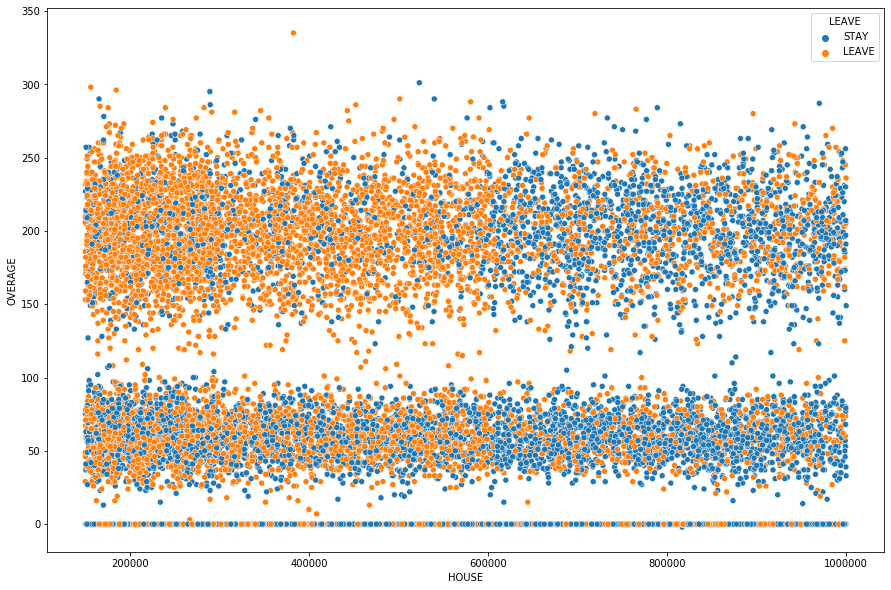

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="HOUSE", y="OVERAGE", hue="LEAVE", data=data)

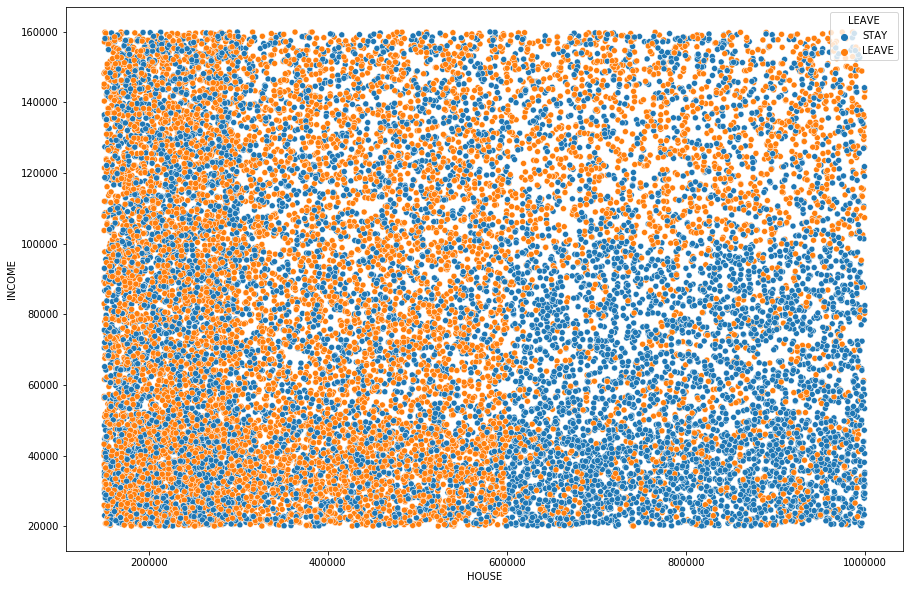

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="HOUSE", y="INCOME", hue="LEAVE", data=data)

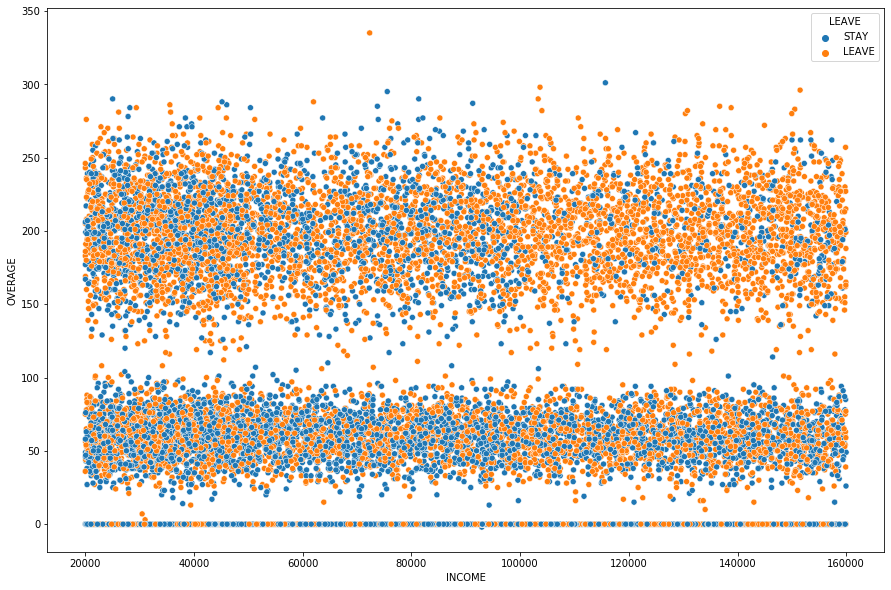

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="INCOME", y="OVERAGE", hue="LEAVE", data=data)

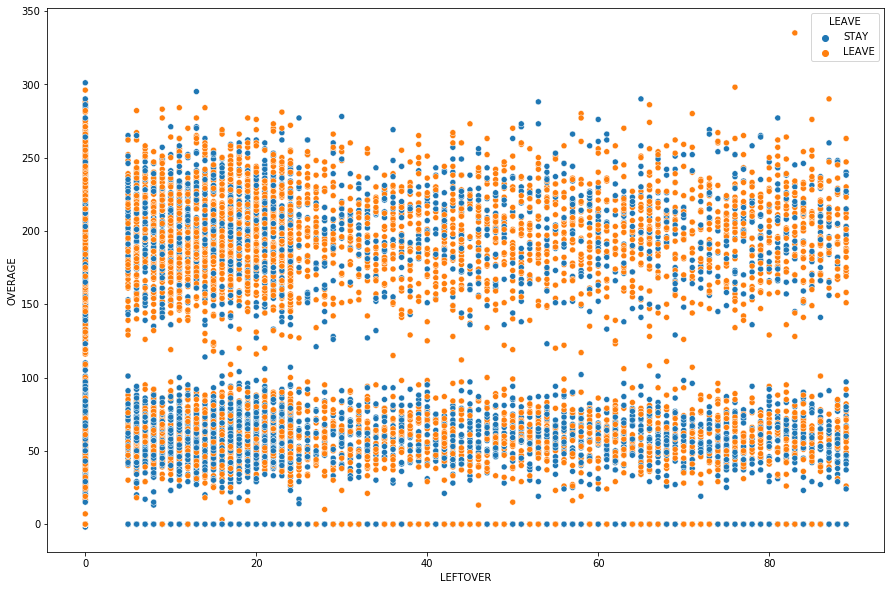

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="LEFTOVER", y="OVERAGE", hue="LEAVE", data=data)

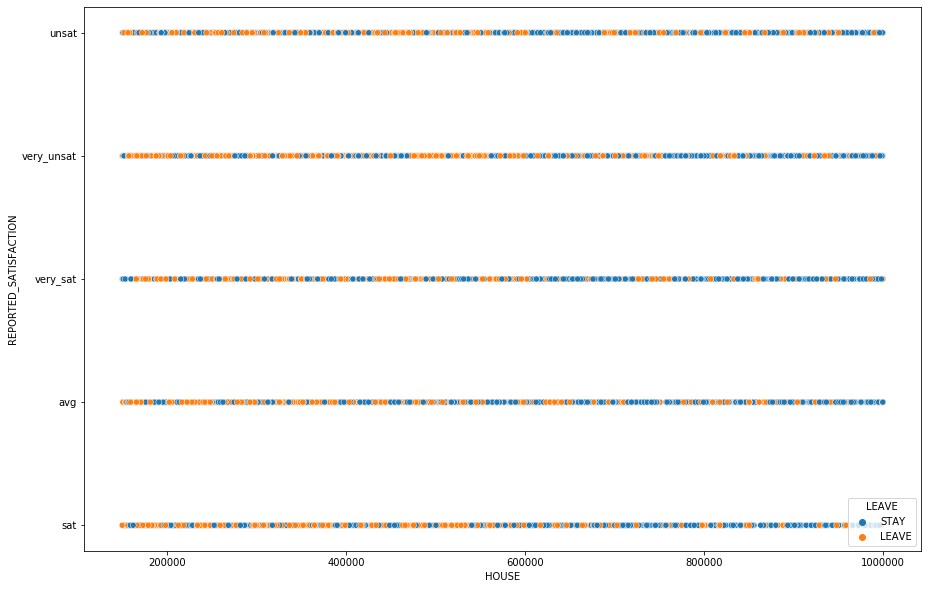

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="HOUSE", y="REPORTED_SATISFACTION", hue="LEAVE", data=data)

# Pairplots

<Figure size 1080x1080 with 0 Axes>

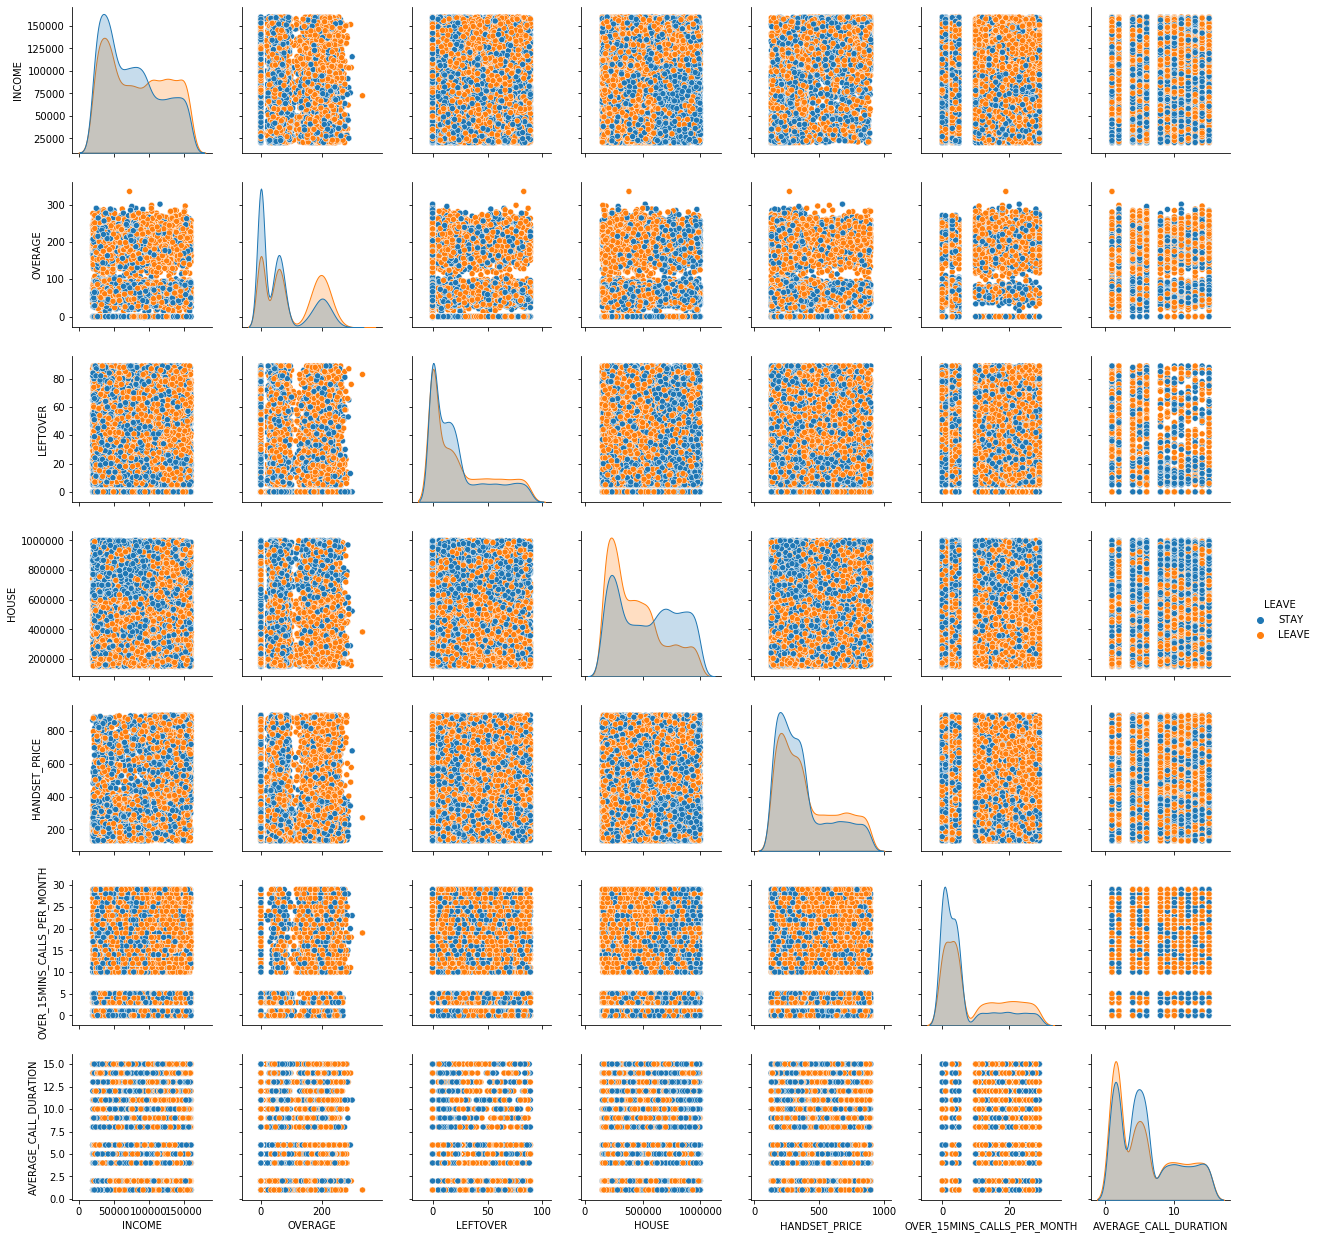

In [26]:
plt.figure(figsize=(15,15))
sns.pairplot(data,hue='LEAVE')

# Boxplots

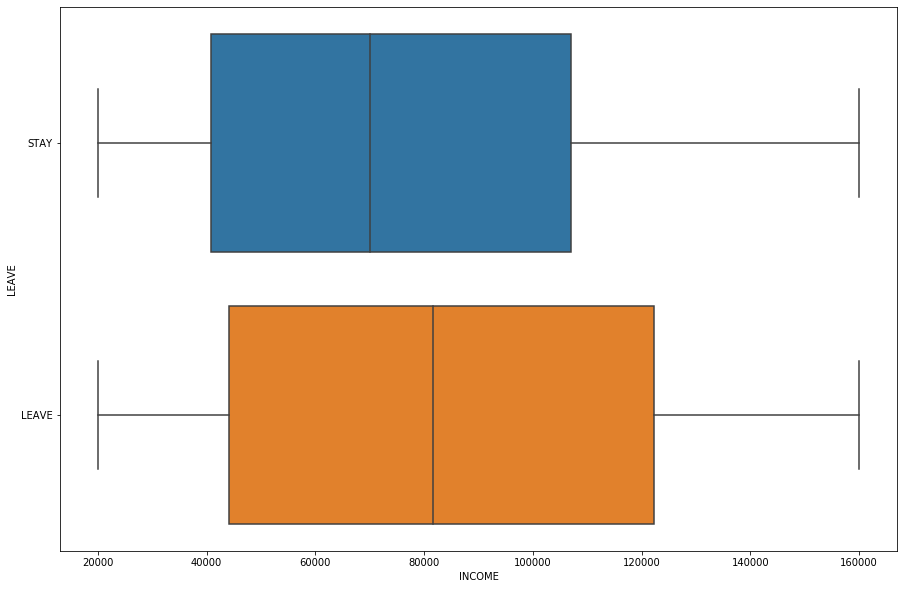

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(x="INCOME", y="LEAVE", data=data)

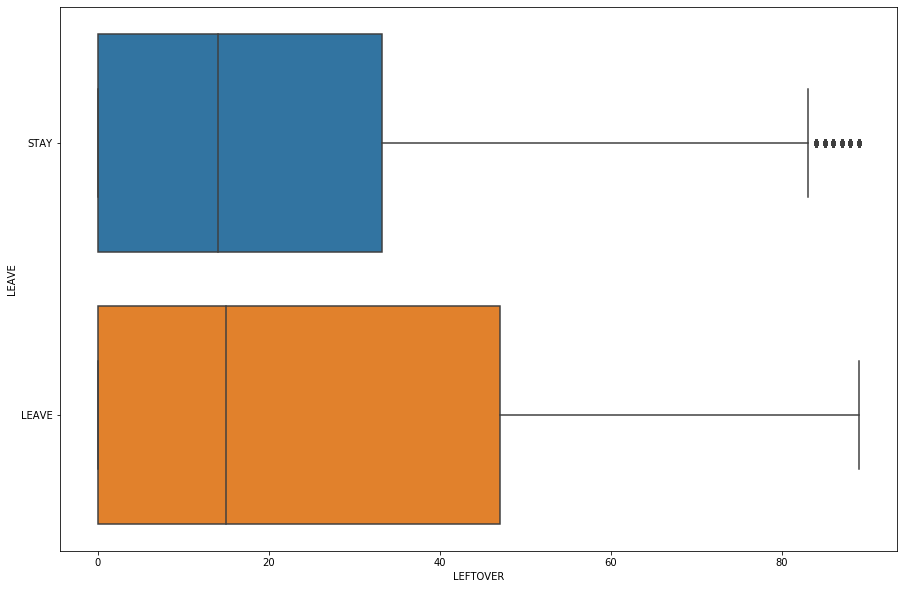

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(x="LEFTOVER", y="LEAVE", data=data)

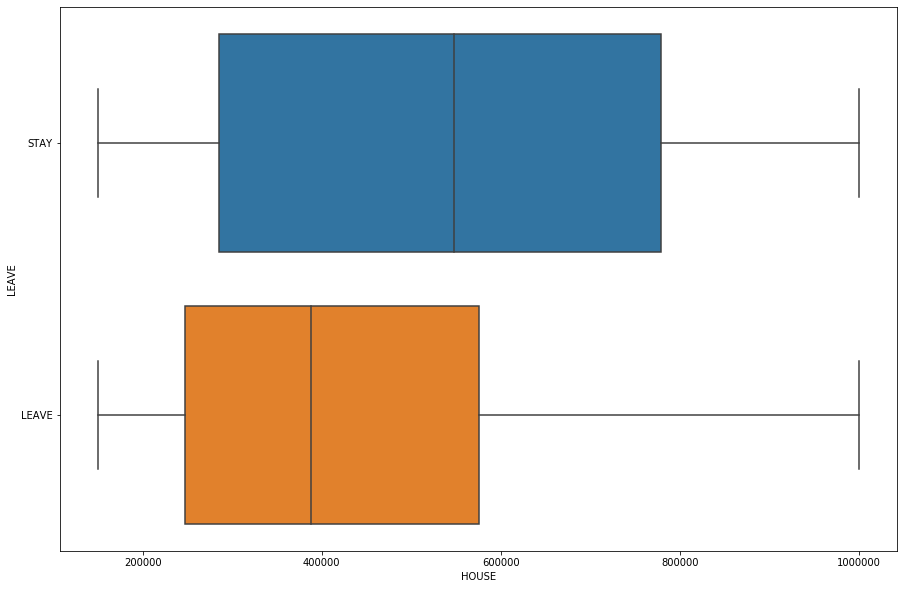

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(x="HOUSE", y="LEAVE", data=data)

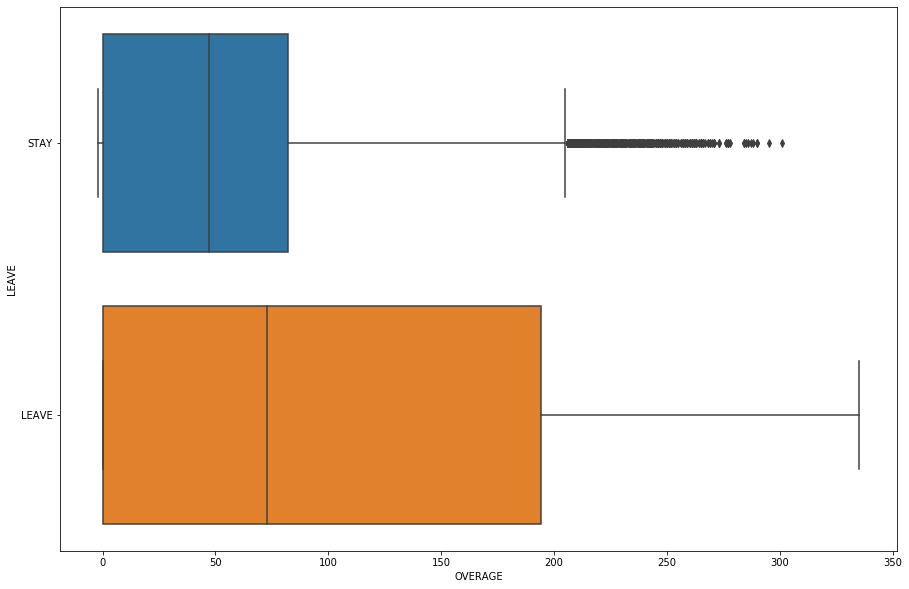

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(x="OVERAGE", y="LEAVE", data=data)

# 2. Proceso completo (Particionamiento + normalización + modelos KNN)

## Protocolos de evaluación

Vamos ahora a evaluar los modelos que calculamos con diferentes protocolos de evaluación para tener una idea más clara de la calidad de los mismos, e identificar posibles casos de modelos que sufren de overfitting (sobreaprendizaje).

In [31]:
data.shape[0] #Se tienen 20000 filas

20000

Obtenemos las variables independientes numéricas y la variable dependiente

In [32]:
numericVars = data.iloc[:,1:8]
depVar = data['LEAVE']

## Holdout (split)

Vamos a separar el dataset en 2 partes: 75% de los datos se van a utilizar para aprender, 25% para evaluar el modelo de clasificación. Utilizamos el método train_test_split de scikit-learn, que se encarga de hacer el particionamiento aleatorio:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(numericVars, depVar, random_state=1234, test_size = 0.25)

Los parámetros de este método son:
- train_size o test_size: define la proporción del dataset que se irán al training set o al test set.
- random_state: define la **semilla** a utilizar para incializar el generador de números pseudo-aleatorios. Se requiere que los resultados obtenidos con la partición sean eventualmente reproducibles. La semilla aleatoria debe inicalizarse en el mismo valor para obtener los mismos resultados.
- stratify: indica un array con los valores de una variable que se quiere tener en cuenta en el particionamiento, de tal manera que las proporciones originales se conserven después de la partición.

In [34]:
X_train.shape

(15000, 7)

Vamos a reescalar las variables predictivas para que tengan la misma importancia, siguiendo un proceso de estandarización.

In [35]:
x = X_train.values
x_std = StandardScaler().fit_transform(x)
X_train_std = pd.DataFrame(x_std)

In [36]:
x = X_test.values
x_std = StandardScaler().fit_transform(x)
X_test_std = pd.DataFrame(x_std)

Entrenamos varios modelos knn para encontrar el k más apropiado.

In [37]:
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,31,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_train_std)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test_std)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

[1.0, 0.8044666666666667, 0.7588666666666667, 0.743, 0.7304666666666667, 0.7264, 0.7209333333333333, 0.7162, 0.7163333333333334, 0.7126, 0.7128, 0.7114666666666667, 0.7114, 0.7102, 0.7070666666666666]
[0.6196, 0.6496, 0.6666, 0.6718, 0.676, 0.6788, 0.6862, 0.6882, 0.6834, 0.6908, 0.6918, 0.6898, 0.688, 0.6946, 0.6934]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


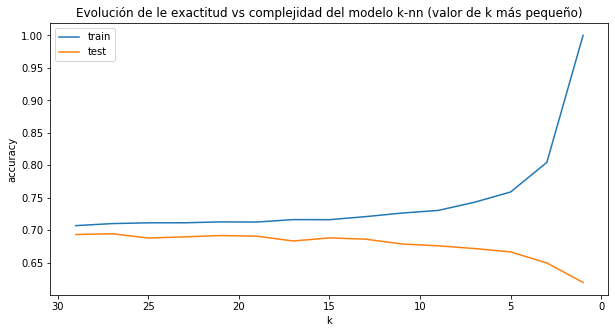

In [38]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [39]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_std, y_train)
y_preds = knn.predict(X_train_std)
print("Clases reales   : ", y_train)
print("Clases predichas: ", y_preds)

Clases reales   :  7928      STAY
4298     LEAVE
2484     LEAVE
2143     LEAVE
17105    LEAVE
         ...  
8222     LEAVE
9449      STAY
8471      STAY
17048     STAY
1318     LEAVE
Name: LEAVE, Length: 15000, dtype: object
Clases predichas:  ['STAY' 'LEAVE' 'LEAVE' ... 'STAY' 'STAY' 'LEAVE']


Obtenemos la matriz de confusión sobre el mismo conjunto de entrenamiento.

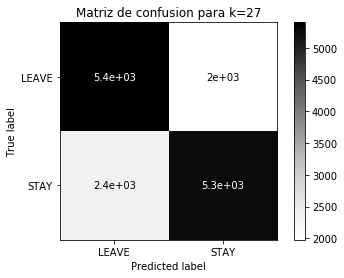

In [40]:
cm= metrics.confusion_matrix(y_train, y_preds)
metrics.plot_confusion_matrix(knn,X_train_std,y_train,cmap=plt.cm.Greys)
plt.title("Matriz de confusion para k=27")
tick_marks = np.arange(3)
plt.show()

Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de entrenamiento

In [41]:
print("Exactitud: ", metrics.accuracy_score(y_train, y_preds))
print("Kappa    : ", metrics.cohen_kappa_score(y_train, y_preds))
print("Precisión     : ", metrics.precision_score(y_train, y_preds, labels='LEAVE', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_preds, labels='LEAVE', average='macro'))
VN = cm[1,1]
FP = cm[1,0]
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_preds, labels='LEAVE', average='macro'))

Exactitud:  0.7102
Kappa    :  0.4207394621221441
Precisión     :  0.7107621294076902
Recall        :  0.7105496427652516
Especificidad :  0.6892299619572347
F1-score      :  0.7101729172692692


In [42]:
y_preds = knn.predict(X_test_std)
print("Clases reales   : ", y_test)
print("Clases predichas: ", y_preds)

Clases reales   :  18172    LEAVE
16075    LEAVE
15388    LEAVE
13842     STAY
8610      STAY
         ...  
17208     STAY
15949     STAY
260      LEAVE
9587      STAY
7892     LEAVE
Name: LEAVE, Length: 5000, dtype: object
Clases predichas:  ['LEAVE' 'STAY' 'LEAVE' ... 'STAY' 'STAY' 'STAY']


Obtenemos la matriz de confusión sobre el conjunto de prueba.

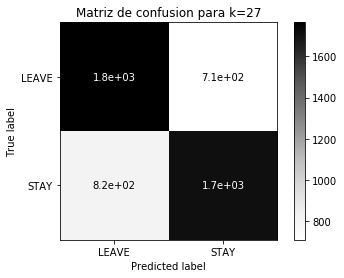

In [43]:
cm= metrics.confusion_matrix(y_test, y_preds)
metrics.plot_confusion_matrix(knn,X_test_std,y_test,cmap=plt.cm.Greys)
plt.title("Matriz de confusion para k=27")
tick_marks = np.arange(3)
plt.show()

Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba

In [44]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_preds))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_preds))
print("Precisión     : ", metrics.precision_score(y_test, y_preds, labels='LEAVE', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_preds, labels='LEAVE', average='macro'))
VN = cm[1,1]
FP = cm[1,0]
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_preds, labels='LEAVE', average='macro'))

Exactitud:  0.6946
Kappa    :  0.38939539347408836
Precisión     :  0.6949596386699981
Recall        :  0.6947794779477948
Especificidad :  0.6768316831683169
F1-score      :  0.6945630421280975


PREGUNTA: Intentemos el mismo proceso con otra semilla (otro particionamiento), por ejemplo con 3457. ¿Qué opinan de los resultados de los dos modelos? ¿Cómo explican las diferencias?

## K-fold cross-validation

Este protocolo de evaluación consiste en dividir el dataset en K pedazos de igual tamaño, y analizar el rendimiento de un modelo aprendido que va rotando sobre k-1 subconjuntos y evaluado en el subconjunto faltante (El K del K-fold no tiene niguna relación con el K del K-NN). 
En el caso de clasificación, particionamiento se hace aleatoriamente y de manera estratificada con respecto a la variable objetivo.
Las métricas finales son las agregaciones de las evaluaciones de los K modelos.

#### cross_val_score

*scikit-learn* cuenta con una función que permite repetir el proceso de particionamiento y evaluación del K-fold CV. Se trata de **cross_val_score**, que recibe los siguientes parámetros:
- la instancia del modelo que se quiere evaluar, 
- los datos de las variables independiente, 
- los datos reales de la variable dependiente, 
- cv: el número de veces que se va a repetir el proceso de cross-validation
- scoring: la métrica que se desea evaluar

In [45]:
x = numericVars.values
x_std = StandardScaler().fit_transform(x)
X_std = pd.DataFrame(x_std)
y = depVar

In [46]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
exactitudes = cross_val_score(knn, X_std, y, cv=10, scoring='accuracy')
exactitudes

array([0.666 , 0.674 , 0.6845, 0.6845, 0.679 , 0.684 , 0.676 , 0.6835,
       0.6865, 0.699 ])

Vemos que los scores de las 10 iteraciones del CV dan resultados entre 66.6% y 69.9%. Podemos obtener un intervalo de confianza del 95% para estimar el valor de la exactitud generalizada.

In [47]:
print("Exactitudes: %0.2f (+/- %0.2f)" % (exactitudes.mean(), exactitudes.std() * 2))

Exactitudes: 0.68 (+/- 0.02)


#### cross_validate

El problema es que con este método solo se puede evaluar una sola métrica a la vez, y que debe ser una métrica global, o tratar una clasificación binaria.

El método **cross_validate** permite evaluar mas de una métrica a la vez, pero en el caso de categorías que no sean binarias, las métricas de precision, recall y f1 son agregadas. La salida de este método es un directorio con las métricas resultantes, que además incluye el tiempo de aprendizaje y de evaluación de cada iteración.

In [48]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
scores = cross_validate(knn, X_std, y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.02 (+/- 0.00)
score_time: 0.16 (+/- 0.01)
test_accuracy: 0.68 (+/- 0.02)
test_precision_weighted: 0.68 (+/- 0.02)
test_recall_weighted: 0.68 (+/- 0.02)
test_f1_weighted: 0.68 (+/- 0.02)


#### Iteradores de cross-validation: KFold, StratifiedKFold, LeaveOneOut

Podemos utilizar también clases específicas para los particionamientos de los datos que permiten mucha más flexibilidad. Las clases **KFold**, **RepeatedKFold**, y **LeaveOneOut** se limitan a crear iteradores que retornan los subconjuntos de training y test.

Es importante anotar que estos iteradores parten del supuesto de independencia de los registros, por lo que es necesario barajarlos previamente.

KFold solo particiona los datos en subconjuntos de items.

In [49]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
kf = KFold(n_splits=10, shuffle=True)
acc_test_vec=[]

In [50]:
for indices_train, indices_test in kf.split(X_std):
    #print("%s %s" % (indices_train, indices_test))
    knn.fit(X_std.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(X_std.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y.iloc[indices_test], y_pred))  
acc_test_vec

[0.665, 0.688, 0.6905, 0.687, 0.707, 0.666, 0.6705, 0.6815, 0.676, 0.6855]

Un caso particular es cuando el K del KFold es igual al tamaño de la muestra. En tal caso, se obtiene un protocolo de LeaveOneOut. En este caso los resultados para cada test set (de tamaño 1) solo pueden ser del 100% o del 0%.

### No correr este

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
loocv = LeaveOneOut()
acc_test_vec=[]
for indices_train, indices_test in loocv.split(X_std):
    #print("%s %s" % (indices_train, indices_test))
    knn.fit(X_std.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(X_std.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y[indices_test], y_pred))  
np.mean(acc_test_vec)

Una mejora se logra con el StratifiedKFold, pues se tiene en cuenta las proporciones de la variable objetivo en la partición, controlando un poco un posible sesgo en la aleatoriedad.

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
acc_test_vec=[]
for indices_train, indices_test in kf.split(X_std, y):
    knn.fit(X_std.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(X_std.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y.iloc[indices_test], y_pred))  
acc_test_vec

In [ ]:
X_train_std.shape

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5, direction='forward')
sfs.fit(X_train_std,y_train)
X_fs = sfs.transform(X_train)

In [ ]:
X_fs.shape

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=27)
knn.fit(X_fs,y_train)
preds = knn.predict(X_fs)
metrics.accuracy_score(y_train,preds)